In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#To convert from excel to csv
# read_file = pd.read_excel ("Dry_Bean_Dataset.xlsx")
# read_file.to_csv ("Dry_Bean_Dataset.csv", index = None,header=True)

csvData = pd.read_csv("Dry_Bean_Dataset.csv", na_values=('?'))
df = csvData.fillna(csvData.mean())

#Encoding Objects
from sklearn.preprocessing import OrdinalEncoder
ordEncoder = OrdinalEncoder()

df["Type"] = ordEncoder.fit_transform(df[["Class"]])
df = df.select_dtypes(exclude = ['object']).copy()



In [3]:
#Splitting the Data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Type', axis = 1), df['Type'], test_size = 0.1, random_state = 150) 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [4]:

#Importing Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score


knn_classifier = KNeighborsClassifier(n_neighbors=5)
rf_classifier = RandomForestClassifier(n_estimators=10)
dt_classifier = DecisionTreeClassifier(random_state=5)
nb_classifier = GaussianNB()
svc_classifier = SVC(C=4.0)

#Training, Testing and Calculating accuracy

#KNN CLASSIFIER
knn_classifier.fit(X_train, y_train)
knn_predict = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predict)
print('KNeighbors Classifier accuracy score:',knn_accuracy)

#RANDOM FOREST CLASSIFIER
rf_classifier.fit(X_train, y_train)
rf_predict = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predict)
print('Random Forest Classifier accuracy score:',rf_accuracy)

#DECISION TREE CLASSIFIER
dt_classifier.fit(X_train, y_train)
dt_predict = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predict)
print('Decision Tree Classifier accuracy score:', dt_accuracy)

#NAIVE BAYES CLASSIFIER
nb_classifier.fit(X_train, y_train)
nb_predict = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predict)
print('Naive Bayes accuracy score:',nb_accuracy)

#SUPPORT VECTOR CLASSIFIER
svc_classifier.fit(X_train,y_train)
svc_predict = svc_classifier.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predict)
print('Support Vector Classifier accuracy score:',svc_accuracy)



KNeighbors Classifier accuracy score: 0.9353891336270191
Random Forest Classifier accuracy score: 0.9265785609397944
Decision Tree Classifier accuracy score: 0.9155653450807636
Naive Bayes accuracy score: 0.908223201174743
Support Vector Classifier accuracy score: 0.947136563876652


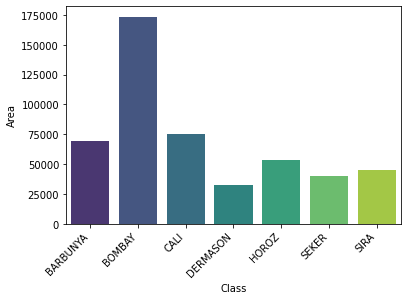

In [ ]:
ClassMean = csvData.groupby('Class').mean()
Area_plot = sns.barplot(x=ClassMean.index, y='Area',data=ClassMean, palette='viridis')
Area_plot = Area_plot.set_xticklabels(Area_plot.get_xticklabels(), rotation=45, horizontalalignment='right')


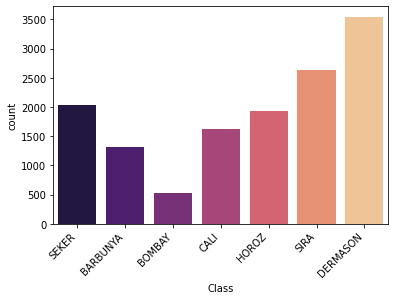

In [ ]:
count_plot = sns.countplot(x='Class', data=csvData, palette='magma')
count_plot = count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

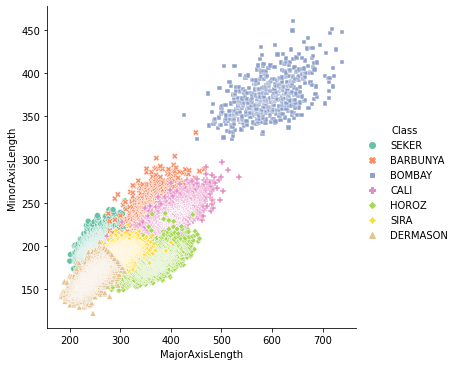

In [ ]:
sns.relplot(x = "MajorAxisLength", y="MinorAxisLength", data=csvData, hue="Class", style="Class", palette="Set2")

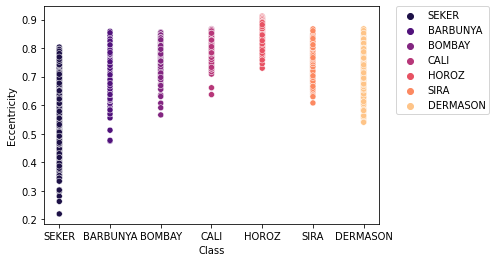

In [ ]:
eccentricity_plot = sns.scatterplot(x='Class',y='Eccentricity', hue="Class",palette='magma',data=csvData)
eccentricity_plot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


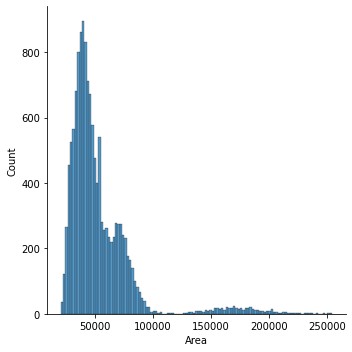

In [ ]:
sns.displot(df['Area'])

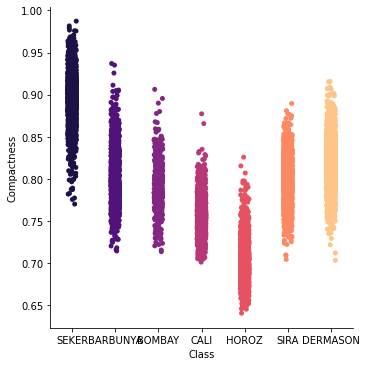

In [6]:
sns.catplot(x="Class", y="Compactness",hue="Class",palette='magma', data=csvData);


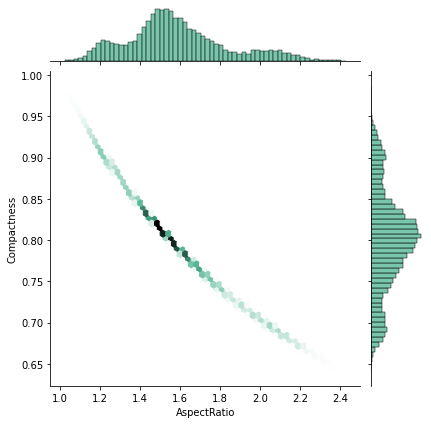

In [ ]:
sns.jointplot(x='AspectRatio', y='Compactness',data=df, kind="hex", color="#4CB391")
